# Numerically evolving Harmonic oscillator

H(p, q) = p^2/(2m^2) + kq^2/2, k = m = 1 here

# Analytical solution

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import statistics
import warnings
warnings.filterwarnings("ignore")

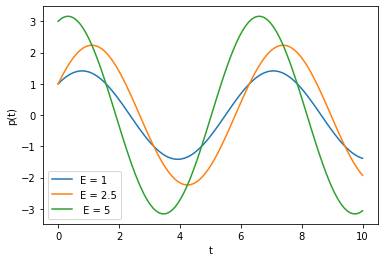

In [4]:
t = np.linspace(0, 10, 100)
A = 1 #-A is initial position
B = 1 #B is initial momentum

#plot momentum p(t)
plt.plot(t, A*np.sin(t) + B*np.cos(t), label="E = 1")
plt.plot(t, 2*A*np.sin(t) + B*np.cos(t), label = "E = 2.5")
plt.plot(t, A*np.sin(t) + 3*B*np.cos(t), label = " E = 5")
#plt.xaxis
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

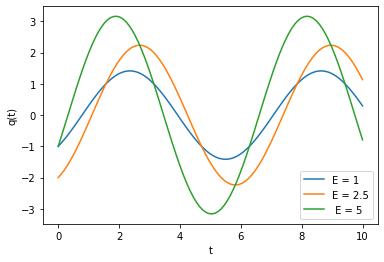

In [5]:
t = np.linspace(0, 10, 100)
A = 1 #-A is initial position
B = 1 #B is initial momentum

#plot momentum p(t)
plt.plot(t, -A*np.cos(t) + B*np.sin(t), label="E = 1")
plt.plot(t, -2*A*np.cos(t) + B*np.sin(t), label = "E = 2.5")
plt.plot(t, -A*np.cos(t) + 3*B*np.sin(t), label = " E = 5")
#plt.xaxis
plt.ylabel('q(t)')
plt.xlabel('t')
plt.legend()
plt.show()

In [6]:
from mpl_toolkits import mplot3d

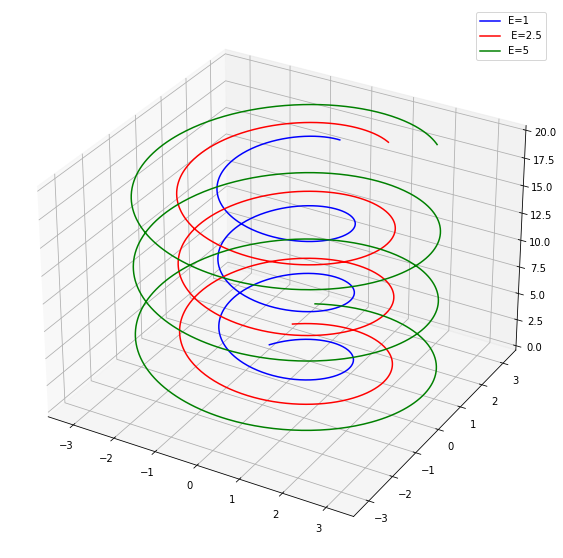

In [7]:
fig1=plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

#E = 1
tline = np.linspace(0, 20, 1000)
qline = -A*np.cos(tline) + B*np.sin(tline)
pline = A*np.sin(tline) + B*np.cos(tline)
ax.plot3D(qline, pline, tline, 'blue', label = "E=1")


#E = 2.5
tline = np.linspace(0, 20, 1000)
qline1 = -A*np.cos(tline) + 2*B*np.sin(tline)
pline1 = A*np.sin(tline) + 2*B*np.cos(tline)
ax.plot3D(qline1, pline1, tline, 'red', label = " E=2.5")


#E = 5
tline = np.linspace(0, 20, 1000)
qline2 = -A*np.cos(tline) + 3*B*np.sin(tline)
pline2 = A*np.sin(tline) + 3*B*np.cos(tline)
ax.plot3D(qline2, pline2, tline, 'green', label = "E=5")
ax.legend()

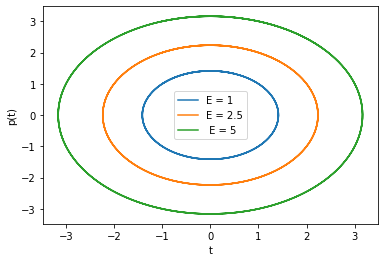

In [8]:
plt.plot(qline, pline, label="E = 1")
plt.plot(qline1, pline1, label = "E = 2.5")
plt.plot(qline2, pline2, label = " E = 5")
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

# Euler forward

In [9]:
dt = 0.02
#initial conditions
q0 = 0
p0 = 1


n = 5000 #number of timesteps
q = [q0]
p = [p0]
t = [0]
e = [q0**2/2+p0**2/2]

for i in range(0,n):
    q0 = q[i] + dt*p[i]
    p0 = p[i] - dt*q[i]
    t.append(dt*i)
    p.append(p0)
    q.append(q0)
    e.append(q0**2/2+p0**2/2)

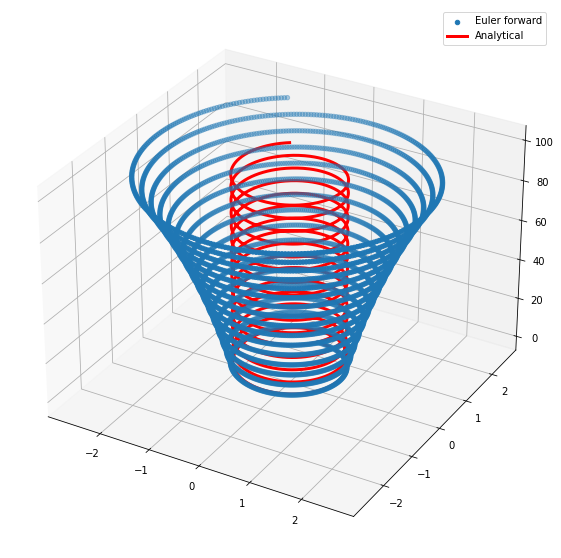

In [10]:
fig1=plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

A=0
B = 1
#E = 1/2
ax.scatter3D(q,p,t, label = "Euler forward")
tline = np.linspace(0, 100, 5000)
qline = -A*np.cos(tline) + B*np.sin(tline)
pline = A*np.sin(tline) + B*np.cos(tline)
ax.plot3D(qline, pline, tline, 'red', linewidth = "3", label = "Analytical")
ax.legend()

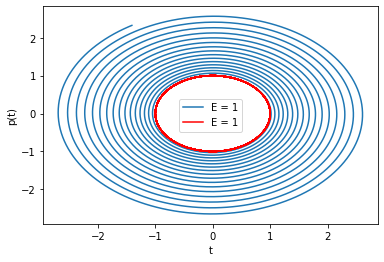

In [11]:
plt.plot(q, p, label="E = 1")
plt.plot(qline, pline, "red", label="E = 1")
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

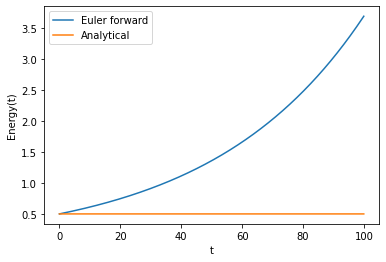

In [12]:
#plot energy e(t)
plt.plot(t, e, label="Euler forward")
plt.plot(t, np.zeros(n+1)+1/2, label="Analytical")
plt.ylabel('Energy(t)')
plt.xlabel('t')
plt.legend()
plt.show()

# implicit euler

In [13]:
dt = 0.02
#initial conditions
q1 = 0
p1 = 1


n = 5000 #number of timesteps
qq = [q1]
pp = [p1]
t = [0]
e1 = [q1**2/2+p1**2/2]

for i in range(0,n):
    q1 = qq[i] + (dt*pp[i]-dt**2*qq[i])/(1+dt**2)
    p1 = (pp[i] - dt*qq[i])/(1+dt**2)
    t.append(dt*i)
    pp.append(p1)
    qq.append(q1)
    e1.append(q1**2/2+p1**2/2)

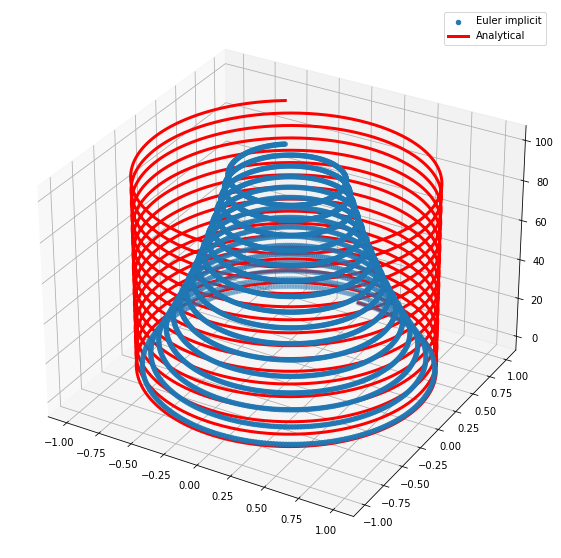

In [14]:
fig1=plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

#E = 1/2
ax.scatter3D(qq,pp,t, label = "Euler implicit")
tline = np.linspace(0, 100, 5000)
qline = -A*np.cos(tline) + B*np.sin(tline)
pline = A*np.sin(tline) + B*np.cos(tline)
ax.plot3D(qline, pline, tline, 'red', linewidth = "3", label = "Analytical")
ax.legend()

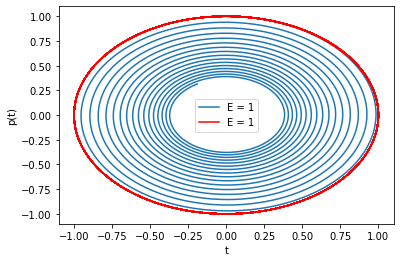

In [15]:
plt.plot(qq, pp, label="E = 1")
plt.plot(qline, pline, "red", label="E = 1")
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

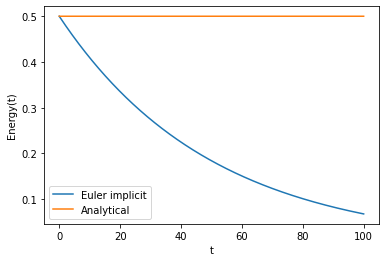

In [16]:
#plot energy e(t)
plt.plot(t, e1, label="Euler implicit")
plt.plot(t, np.zeros(n+1)+1/2, label="Analytical")
plt.ylabel('Energy(t)')
plt.xlabel('t')
plt.legend()
plt.show()

# leapfrog

In [17]:
dt = 0.02
#initial conditions
q0 = 0
p0 = 1
#qm1 = 0.02
#pm1 = 1.02


n = 5000 #number of timesteps
q2 = [q0, qq[1]]
p2 = [p0, pp[1]]
t = [0, dt]
e2 = [q0**2/2+p0**2/2, qq[1]**2/2+pp[1]**2/2]

for i in range(1,n+1):
    q3 = q2[i-1] + 2*dt*p2[i]
    p3 = p2[i-1] - 2*dt*q2[i]
    t.append(dt*i)
    p2.append(p3)
    q2.append(q3)
    e2.append(q3**2/2+p3**2/2)

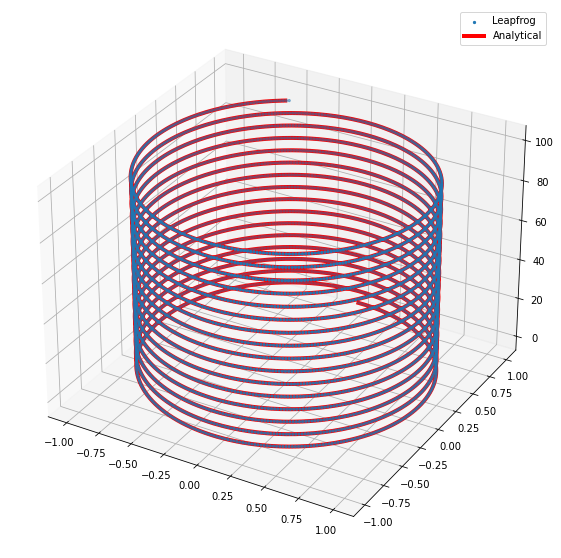

In [18]:
#E = 1
fig1=plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

ax.scatter3D(q2,p2,t, marker = ".", label="Leapfrog")
tline = np.linspace(0, 100, 5000)
qline = -A*np.cos(tline) + B*np.sin(tline)
pline = A*np.sin(tline) + B*np.cos(tline)
ax.plot3D(qline, pline, tline, 'red', linewidth = "4", label = "Analytical")
ax.legend()

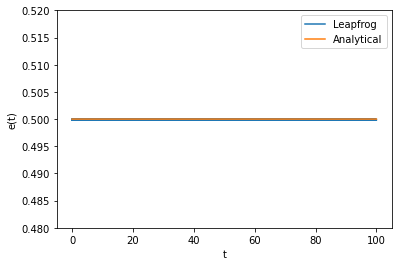

In [19]:
#plot energy e(t)
plt.plot(t, e2, label="Leapfrog")
plt.plot(t, np.zeros(n+2)+1/2, label="Analytical")
plt.ylabel('e(t)')
plt.xlabel('t')
plt.legend()
plt.ylim([0.48,0.52])
plt.show()

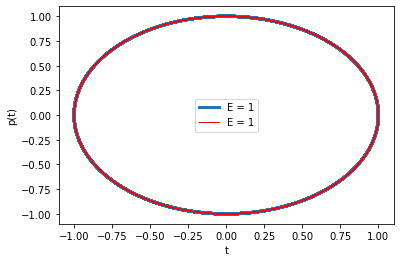

In [20]:
plt.plot(q2, p2, label="E = 1", linewidth ="3")
plt.plot(qline, pline, "red", linewidth = "1", label="E = 1")
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

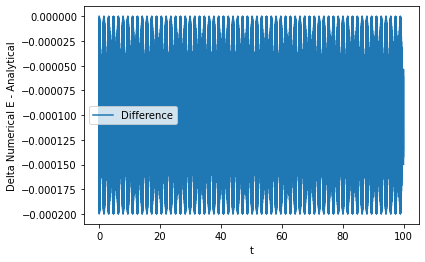

In [21]:
#plot energy e(t)
plt.plot(t, e2-np.zeros(n+2)-1/2, label="Difference")
plt.ylabel('Delta Numerical E - Analytical')
plt.xlabel('t')
plt.legend()
#plt.ylim([0.48,0.52])
plt.show()

# velocity verlet algorithm

In [22]:
dt = 0.02
#initial conditions
q0 = 0
p0 = 1


n = 5000 #number of timesteps
qc = [q0]
pc = [p0]
t = [0]
ec = [q0**2/2+p0**2/2]

for i in range(0,n):
    q3 = qc[i] + pc[i]*dt-qc[i]/2*dt**2
    qc.append(q3)
    p3 = pc[i] - (qc[i]+qc[i+1])/2*dt
    t.append(dt*i)
    pc.append(p3)
    ec.append(q3**2/2+p3**2/2)

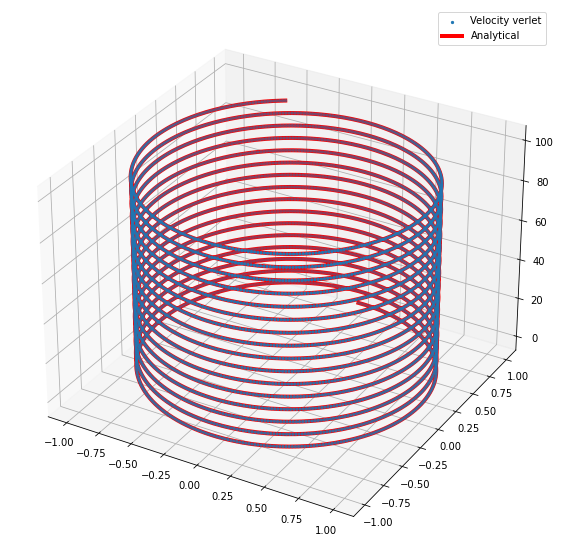

In [23]:
#E = 1
fig1=plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

ax.scatter3D(qc,pc,t, marker = ".", label = "Velocity verlet")
tline = np.linspace(0, 100, 5000)
qline = -A*np.cos(tline) + B*np.sin(tline)
pline = A*np.sin(tline) + B*np.cos(tline)
ax.plot3D(qline, pline, tline, 'red', linewidth = "4", label = "Analytical")
ax.legend()

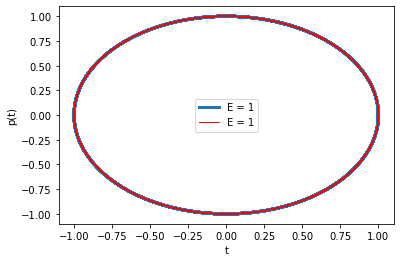

In [24]:
plt.plot(qc, pc, label="E = 1", linewidth ="3")
plt.plot(qline, pline, "red", linewidth = "1", label="E = 1")
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

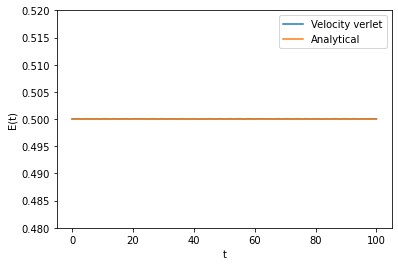

In [25]:
#plot energy e(t)
plt.plot(t, ec, label="Velocity verlet")
plt.plot(t, np.zeros(n+1)+1/2, label="Analytical")
plt.ylabel('E(t)')
plt.xlabel('t')
plt.legend()
plt.ylim([0.48,0.52])
plt.show()

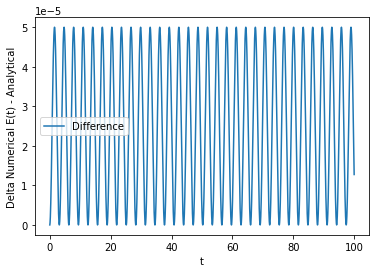

In [26]:
#plot difference
plt.plot(t, ec-np.zeros(n+1)-1/2, label="Difference")
plt.ylabel('Delta Numerical E(t) - Analytical')
plt.xlabel('t')
plt.legend()
plt.show()

# velocity verlet + boltzmann distribution for velocities after small number of timesteps

In [27]:
dt = 0.02
#initial conditions
q0 = 0
p0 = 1
T = 1/2

n = 5000 #number of timesteps
qd = [q0]
pd = [p0]
t = [0]
ed = [q0**2/2+p0**2/2]

def boltzdistr(T):
    v = random.gauss(0, T**(1/2))
    return v


for i in range(0,n):
    if (i+1) % 5 == 0:
        p33 = boltzdistr(T)
        q33 = qc[i] + pc[i]*dt-qc[i]/2*dt**2
        qd.append(q33)
        t.append(dt*i)
        pd.append(p33)
        ed.append(q33**2/2+p33**2/2)
    else:
        q33 = qd[i] + pd[i]*dt-qd[i]/2*dt**2
        qd.append(q33)
        p33 = pd[i] - (qd[i]+qd[i+1])/2*dt
        t.append(dt*i)
        pd.append(p33)
        ed.append(q33**2/2+p33**2/2)

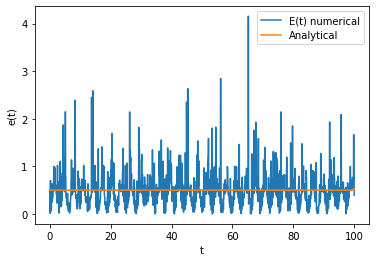

In [28]:
#plot energy e(t)
plt.plot(t, ed, label="E(t) numerical")
plt.plot(t, np.zeros(n+1)+1/2, label="Analytical")
plt.ylabel('e(t)')
plt.xlabel('t')
plt.legend()
#plt.ylim([0.48,0.52])
plt.show()

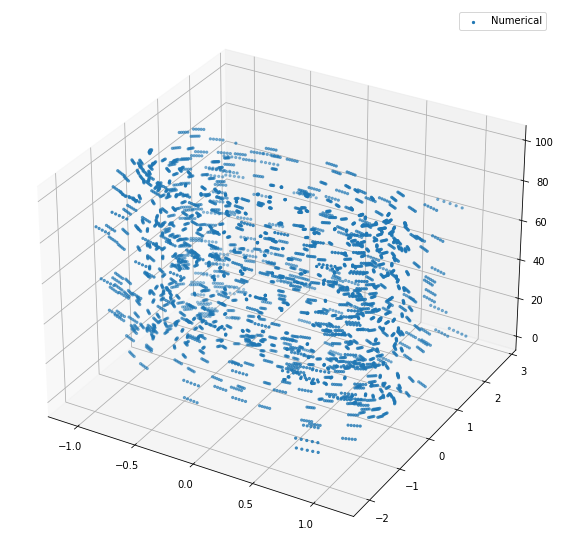

In [29]:
#E = 1
fig1=plt.figure(figsize=(10,10))
ax = fig1.add_subplot(projection='3d')

ax.scatter3D(qd,pd,t, marker = ".", label = "Numerical")
#tline = np.linspace(0, 100, 5000)
#qline = -A*np.cos(tline) + B*np.sin(tline)
#pline = A*np.sin(tline) + B*np.cos(tline)
#ax.plot3D(qline, pline, tline, 'red', linewidth = "2", label = "Analytical")
ax.legend()

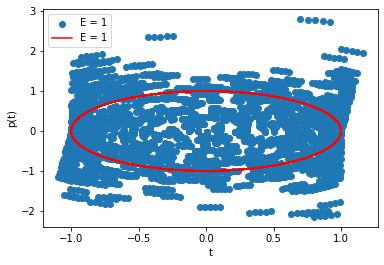

In [31]:
plt.scatter(qd, pd, label="E = 1")
plt.plot(qline, pline, "red", label="E = 1")
plt.ylabel('p(t)')
plt.xlabel('t')
plt.legend()
plt.show()

In [32]:
statistics.mean(ed)

0.5069390271195258

In [33]:
statistics.variance(ed)

0.16218685397448374